In [1]:
import sys
sys.path.append('/workspace/fourth_year_project/HRTF Models/')

from HRIRDataset import HRIRDataset
from MainModel import MainModel 
from BackupWorkingModel import BackupWorkingModel
import matplotlib.pyplot as plt

In [2]:
sofa_file = '/workspace/fourth_year_project/HRTF Models/sofa_hrtfs/RIEC_hrir_subject_001.sofa'
hrir_dataset = HRIRDataset()
for i in range(99,100):
    hrir_dataset.load(sofa_file.replace('001', str(i).zfill(3)))

In [13]:
from torch.utils.data import DataLoader
import torch
# model = BackupWorkingModel()
model = MainModel()
# Set the model to training mode
model.eval()

device = torch.device('cuda')
model = model.to(device)

batch_size = 1

dataloader = DataLoader(hrir_dataset, batch_size=batch_size, shuffle=True, num_workers=6)



/workspace/venv_work/lib/python3.8/site-packages/torch/nn/modules/transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [14]:
model.load_state_dict(torch.load('/workspace/fourth_year_project/HRTF Models/teacher_sampling/model_18.pth'))
# model.load_state_dict(torch.load('/workspace/fourth_year_project/HRTF Models//model_98_step_scheded.pth'))

<All keys matched successfully>

In [15]:
# load in 1 sample from test set
sample = next(iter(dataloader))
src, tgt, angle = sample
src = src.to(device)
tgt = tgt.to(device)
angle = angle.to(device)
angle = angle.float()
src = src.float()
tgt = tgt.float()

# Get first sample from batch
src = src[0]
tgt = tgt[0]
angle = angle[0]

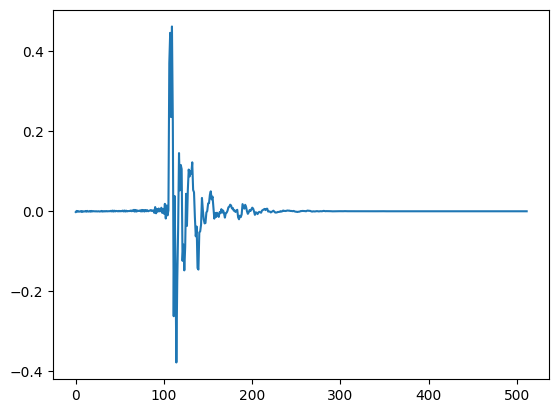

In [16]:
plt.plot(src[0].cpu().detach().numpy())


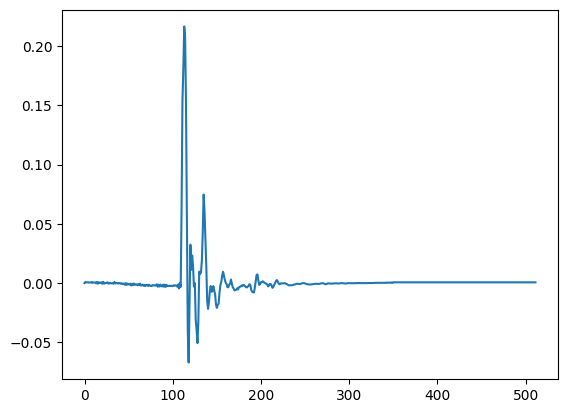

In [17]:
plt.plot(tgt[0].cpu().detach().numpy())

In [18]:
print(src.shape, angle.shape, tgt.shape)
print(angle)
# With target
output = model(src.unsqueeze(0), angle.unsqueeze(0), tgt.unsqueeze(0))
output  = output.squeeze(0)
output.shape

torch.Size([2, 512]) torch.Size([]) torch.Size([2, 512])
tensor(225., device='cuda:0')


torch.Size([3, 512])

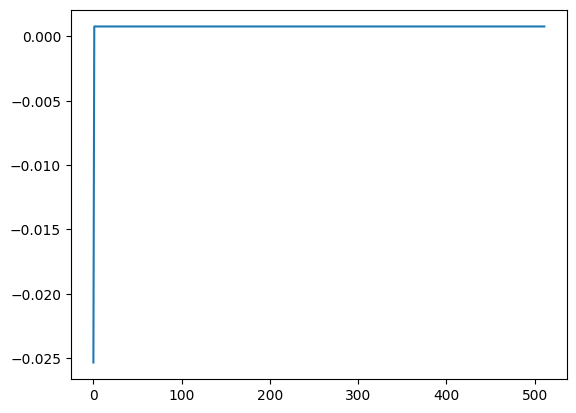

In [19]:
plt.plot(output[0].cpu().detach().numpy())

In [20]:
# Without target
output = model(src.unsqueeze(0), angle.unsqueeze(0))
print(output.shape)
output = output.permute(1, 2, 0)
output  = output.squeeze(0)
output.shape

torch.Size([1, 3, 512])


torch.Size([3, 512, 1])

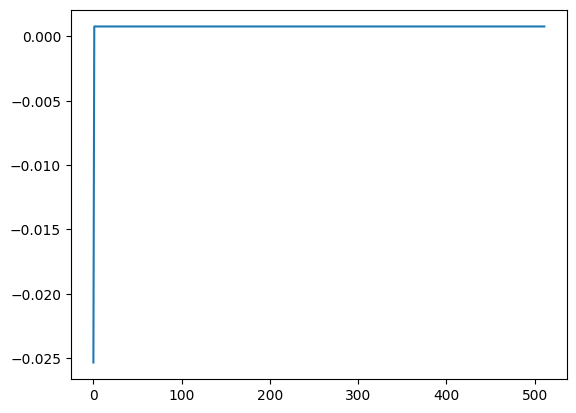

In [21]:
plt.plot(output[0].cpu().detach().numpy())